In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Style matplotlib
plt.style.use(['ggplot'])

email_data = pd.read_csv('Emails.csv')
email_rec_data = pd.read_csv('EmailReceivers.csv')
persons = pd.read_csv('Persons.csv')
aliases = pd.read_csv('Aliases.csv')

In [4]:
# stats
total_emails_rec = email_data[email_data['SenderPersonId'] != 80]['Id'].count()
total_emails_sent = email_data[email_data['SenderPersonId'] == 80]['Id'].count()
print 'Emails Received ' + str(total_emails_rec)
print 'Emails Sent ' + str(total_emails_sent)

Emails Received 5952
Emails Sent 1993


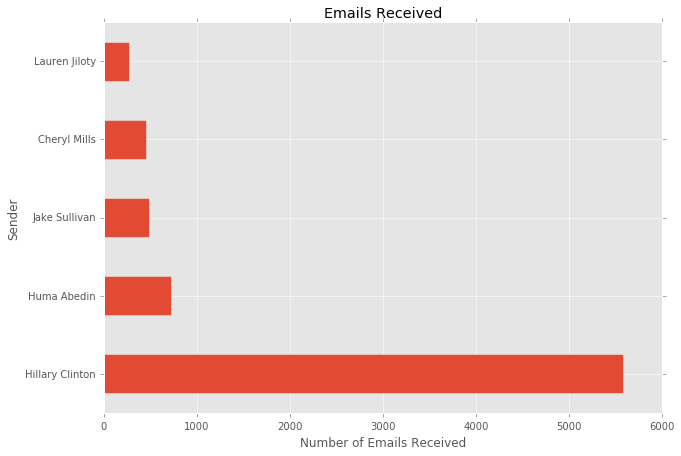

In [5]:
# Create Frequency Distribution from the number of emails received by person
rec_freq = pd.DataFrame(email_rec_data['PersonId'].value_counts())
rec_freq = rec_freq.reset_index()
rec_freq.columns = ['Id','Count']
rec_freq_labeled = pd.merge(rec_freq, persons, on='Id')
rec_freq_labeled[['Name', 'Count']].head().plot(x='Name', kind='barh',
                                                title='Emails Received', figsize=(10,7), legend=False)
plt.xlabel('Number of Emails Received')
plt.ylabel('Sender')

In [6]:
# Clean email data
def clean_email(text):
    text = str(text).decode('utf-8').lower()
    text = ' '.join(text.split())
    text = text.replace('\n', '')
    text = text.replace('NaN', '')
    text = text.lower()
    return text

# add emails to list
email_list = [clean_email(email) for email in email_data['ExtractedBodyText'].tolist()]

# remove extra white space, encode to ascii
email_string = ' '.join(email_list)

(-0.5, 399.5, 199.5, -0.5)

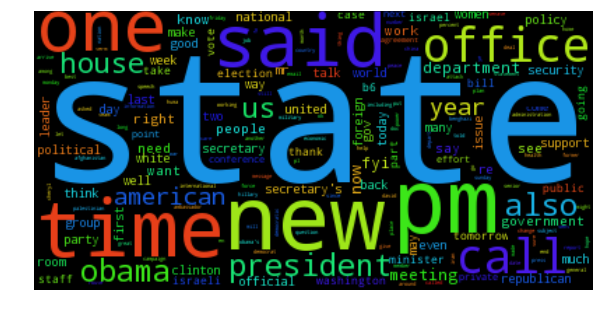

In [11]:
# Generate a word cloud image
STOPWORDS.add('will')
STOPWORDS.add('nan')
wordcloud = WordCloud(stopwords=STOPWORDS)
wordcloud.generate(email_string)

fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(wordcloud)
ax.axis("off")

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


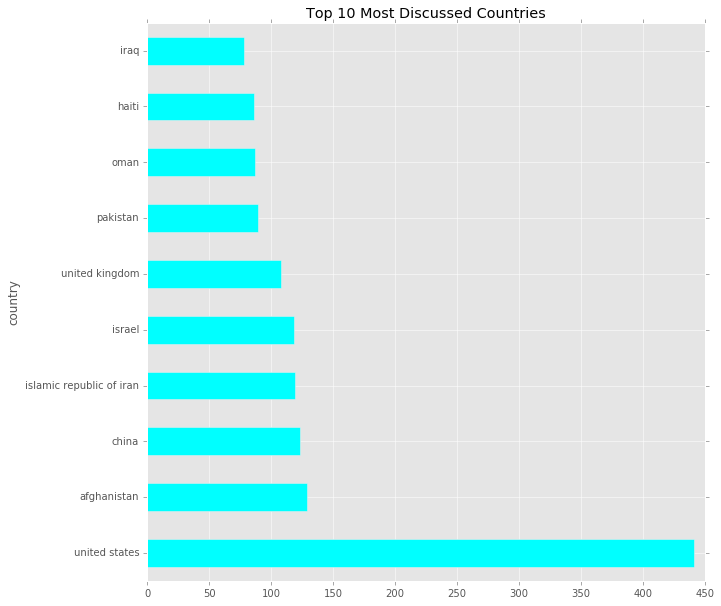

In [8]:
# countries discussed
import csv
country_mapping = {}
with open('CountryMapping.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for r in reader:
        for e in r:
            country_mapping[e.decode('utf-8')] = r[0].decode('utf-8')

# add acronyms for us and uk
country_mapping['u.s.'] = 'united states'
country_mapping['uk'] = 'united kingdom'

# add emails to dict that mention specific country
cc = {}
for email in email_list:
    temp = {} # used to prevent duplicate additions
    for m, c in country_mapping.iteritems():
        if m in email and c not in temp:
            if c in cc:
                cc[c] += 1
            else:
                cc[c] = 1
            temp[c] = True

# plot
country_df = pd.DataFrame(cc.items(), columns=['country', 'count'])
country_df = country_df.sort(['count'], ascending=[0])[:10]
country_df.plot(x='country', kind='barh', color='#00FFFF',
                title='Top 10 Most Discussed Countries', figsize=(10,10), legend=False)